# Value Based Segmentation

Identify how much economic value each customer brings to the airline (AIAI) and group them based on financial contribution and profitability.

This helps the company answer:

“Who are our most valuable customers?”
“Which customers deserve premium attention, loyalty perks, or reactivation campaigns?”

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import cleaned and aggregated data
flights = pd.read_csv('../data/cleaned/flights_cleaned.csv')
customers = pd.read_csv('../data/aggregated/customers_aggregations.csv')

In [8]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,16574.0,549435.680825,258874.788435,100018.000000,326235.500000,550020.000000,771895.750000,999986.000000
Latitude,16574.0,47.174633,3.305623,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16574.0,-91.840494,22.240412,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16574.0,37739.986787,30355.907587,0.000000,0.000000,34137.000000,62373.750000,99981.000000
Customer Lifetime Value,16574.0,7986.494716,6858.499179,1898.010000,3978.822500,5780.180000,8954.430000,83325.380000
IsActive,16574.0,0.864426,0.342346,0.000000,1.000000,1.000000,1.000000,1.000000
CustomerTenureDays,16574.0,2275.160251,1039.713176,-1924.000000,1659.000000,2348.000000,3121.000000,3848.000000
total_flights,16574.0,144.805056,81.723912,0.000000,73.000000,168.000000,207.000000,343.000000
total_flights_with_companions,16574.0,33.702063,22.299848,0.000000,15.000000,35.000000,50.000000,119.000000
total_distance,16574.0,287049.723989,163461.945565,0.000000,144610.425000,331463.550000,413197.350000,712729.600000


In [9]:
flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty#,596664.0,549435.680825,258867.195581,100018.0,326234.00,550020.0,771901.00,999986.0
Year,596664.0,2020.000000,0.816497,2019.0,2019.00,2020.0,2021.00,2021.0
Month,596664.0,6.500000,3.452055,1.0,3.75,6.5,9.25,12.0
NumFlights,596664.0,4.022363,5.015711,0.0,0.00,1.0,8.00,21.0
NumFlightsWithCompanions,596664.0,0.936168,1.968412,0.0,0.00,0.0,1.00,11.0
DistanceKM,596664.0,7973.603444,10269.174348,0.0,0.00,984.5,15400.00,42040.0
PointsAccumulated,596664.0,797.203290,1026.793920,0.0,0.00,98.0,1540.00,4204.0
PointsRedeemed,596664.0,236.469767,985.680370,0.0,0.00,0.0,0.00,7496.0
DollarCostPointsRedeemed,596664.0,2.336869,9.749377,0.0,0.00,0.0,0.00,74.0


## Create Value Metrics (feature engineering)

In [10]:
# Create the row: average distance per flight for each customer
# Divide the value of total distance by the number of flights
customers['Avg_Distance_Per_Flight'] = np.where(
    customers['total_flights'] > 0,
    customers['total_distance'] / customers['total_flights'],
    0
)
customers['Avg_Distance_Per_Flight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16574 entries, 0 to 16573
Series name: Avg_Distance_Per_Flight
Non-Null Count  Dtype  
--------------  -----  
16574 non-null  float64
dtypes: float64(1)
memory usage: 129.6 KB


In [11]:
# --- Schritt 1: Berechnung ---
customers['Avg_Distance_Per_Flight'] = np.where(
    customers['total_flights'] > 0,
    customers['total_distance'] / customers['total_flights'],
    0
)

# --- Schritt 2: Prüfung per Schleife ---
for idx, row in customers.iterrows():
    if row['Avg_Distance_Per_Flight'] > 13000:
        print(f"Kunde mit ID {row['Loyalty#']} hat einen ungewöhnlich hohen Wert: "
              f"{row['Avg_Distance_Per_Flight']:.2f}")

In [12]:
# Count the customers with Avg_Distance_Per_Flight > 13000
high_distance_customers = customers[customers['Avg_Distance_Per_Flight'] > 13000]
print(f"Anzahl der Kunden mit Avg_Distance_Per_Flight > 13000: {len(high_distance_customers)}")

Anzahl der Kunden mit Avg_Distance_Per_Flight > 13000: 0


In [13]:
# describe the new column Avg_Distance_Per_Flight
customers['Avg_Distance_Per_Flight'].describe()

count    16574.000000
mean      1864.942346
std        841.916044
min          0.000000
25%       1608.273197
50%       1933.637207
75%       2260.007893
max      12624.000000
Name: Avg_Distance_Per_Flight, dtype: float64

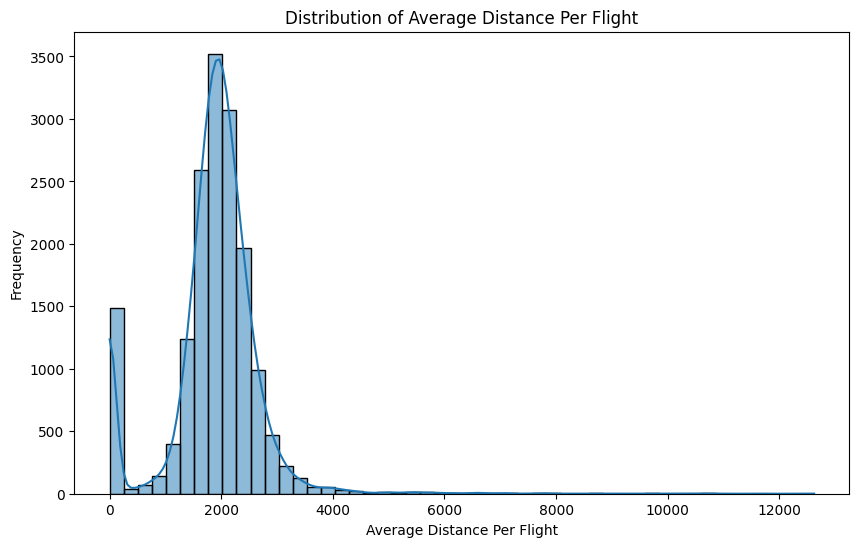

In [14]:
# Visualize the distribution of the new column Avg_Distance_Per_Flight 
plt.figure(figsize=(10, 6))
sns.histplot(customers['Avg_Distance_Per_Flight'], bins=50, kde=True)
plt.title('Distribution of Average Distance Per Flight')
plt.xlabel('Average Distance Per Flight')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Count the Flights with more than 10000 km distance (Avg_Distance_Per_Flight > 10000)
customers_long_distance = customers[customers['Avg_Distance_Per_Flight'] > 10000]
print(f"Number of long distance flights (>10000 km): {len(customers_long_distance)}")

# Print the first 5 rows of these customers
customers_long_distance.head()

Number of long distance flights (>10000 km): 8


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,CustomerTenureDays,total_flights,total_flights_with_companions,total_distance,total_points_accumulated,total_points_redeemed,total_cost_redeemed,points_redemption_ratio,companion_flight_ratio,Avg_Distance_Per_Flight
2074,443557,Kris,Cichonski,Kris Cichonski,Canada,British Columbia,Dawson Creek,55.759628,-120.237660,U5I 4F1,...,1451,2,1,23267.0,2326.0,0.0,0.0,0.000000,0.5,11633.5
5904,731373,Lisha,Genao,Lisha Genao,Canada,New Brunswick,Moncton,46.087818,-64.778229,E1A 2A7,...,1428,2,1,23080.0,2308.0,0.0,0.0,0.000000,0.5,11540.0
7539,305572,Anissa,Merlan,Anissa Merlan,Canada,British Columbia,Vancouver,49.282730,-123.120740,V1E 4R6,...,1459,1,0,10463.0,1046.0,0.0,0.0,0.000000,0.0,10463.0
11064,278059,Renna,Ayars,Renna Ayars,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3Z3,...,1491,2,2,21275.0,2127.0,0.0,0.0,0.000000,1.0,10637.5
11312,756663,Ming,Hunckler,Ming Hunckler,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,...,1453,2,1,21852.0,2185.0,3605.0,36.0,1.649886,0.5,10926.0


In [ ]:
# Zeige alle Einträge in Flights des kunden 483212 an
flights[flights['Loyalty#'] == 483212]

- There are entries in flights where there is a no flight
- We have to fix this in the 00_data_overview notebook

## Visualisations

In [ ]:
# Heatmap to see correlations between numerical features

# Select the relevant numeric columns
value_features = [
    "Customer Lifetime Value",
    "Income",
    "CustomerTenureDays",
    "total_flights",
    "total_flights_with_companions",
    "total_distance",
    "total_points_accumulated",
    "total_points_redeemed",
    "total_cost_redeemed",
    "points_redemption_ratio",
    "companion_flight_ratio"
]

df_val = customers[value_features]


In [ ]:
corr_matrix = df_val.corr(method='pearson')  # or 'spearman' if non-linear
corr_matrix.round(2)


In [ ]:
# ---- Compute correlation matrix ----
corr_matrix = df_val.corr(method='pearson').round(1)

# ---- Mask values below 0.4 ----
annot_matrix = corr_matrix.mask(corr_matrix.abs() < 0.4, "")

# ---- Create lower triangle mask ----
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# ---- Plot ----
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=annot_matrix,
    fmt='',
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correlation Heatmap (|r| ≥ 0.4, Lower Triangle Only)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Plot histograms for all numeric columns
customers.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Histograms for All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# Plot the income in a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=customers, x='Income', bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Plot the total flights in a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=customers, x='total_flights', bins=30, kde=True)
plt.title('Total Flights Distribution')
plt.xlabel('Total Flights')
plt.ylabel('Frequency')


In [ ]:
# Print the customers with 0 total flights
zero_flight_customers = customers[customers['total_flights'] == 0]
print(f"Number of customers with 0 total flights: {len(zero_flight_customers)}")

# Head of 3
zero_flight_customers.head(3)

In [ ]:
# Create a new subset dataframe with customers who have more than 0 total flights
non_zero_flight_customers = customers[customers['total_flights'] > 0]

In [ ]:
# Income on the X-Axis
# CLV on the Y-Axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_flight_customers, x='Income', y='Customer Lifetime Value', alpha=0.6)
plt.title('Customer Lifetime Value vs Income')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()  


In [ ]:
# CLV of customers with 0 total flights
zero_flight_clv = zero_flight_customers['Customer Lifetime Value']
print(f"CLV of customers with 0 total flights:\n{zero_flight_clv.describe()}")

# Head of 3
print(zero_flight_clv.head(3))

# Visualisze CLV distribution for customers with 0 total flights
plt.figure(figsize=(10, 6))
sns.histplot(zero_flight_clv, bins=30, kde=True)
plt.title('CLV Distribution for Customers with 0 Total Flights')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Show me the first 5 rows of zero_flight_customers dataframe with all columns
pd.set_option('display.max_columns', None)
zero_flight_customers.head(5)


In [ ]:
# check customer for the Loyalty# 201574 print
customers[customers['Loyalty#'] == 201574]


- We have to analize what CLV means for us. CLV can be high for customers who have never flown with us. The CLV is not calculated based on actual flights, but on the potential value of the customer.